Nama : Vivian Purnomo
NPM : 220711795
Kelompok SB : SciPy
Topik : Klasifikasi Jenis Apel Berdasarkan Warna
Arsitektur yang dikerjakan : MobileNet

Found 300 files belonging to 3 classes.
Using 270 files for training.
Class Names: ['Apel Hijau', 'Apel Kuning', 'Apel Merah']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
<ipython-input-2-7ce05de7514b>:64: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape=(img_size, img_size, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.4080 - loss: 1.4620
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 958ms/step - accuracy: 0.3815 - loss: 1.3788
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4733 - loss: 1.1924  
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5337 - loss: 1.1226
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5450 - loss: 0.9992  
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6360 - loss: 0.8771
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6021 - loss: 0.8010
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6619 - loss: 0.7426  
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6893 - loss: 0.6361
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7173 - loss: 0.6042
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7358 - loss: 0.6360  
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 976ms/step - accuracy: 0.8005 - loss: 0.5101
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7659 - loss: 0.5525
Epoch 14/

TypeError: cannot pickle 'module' object

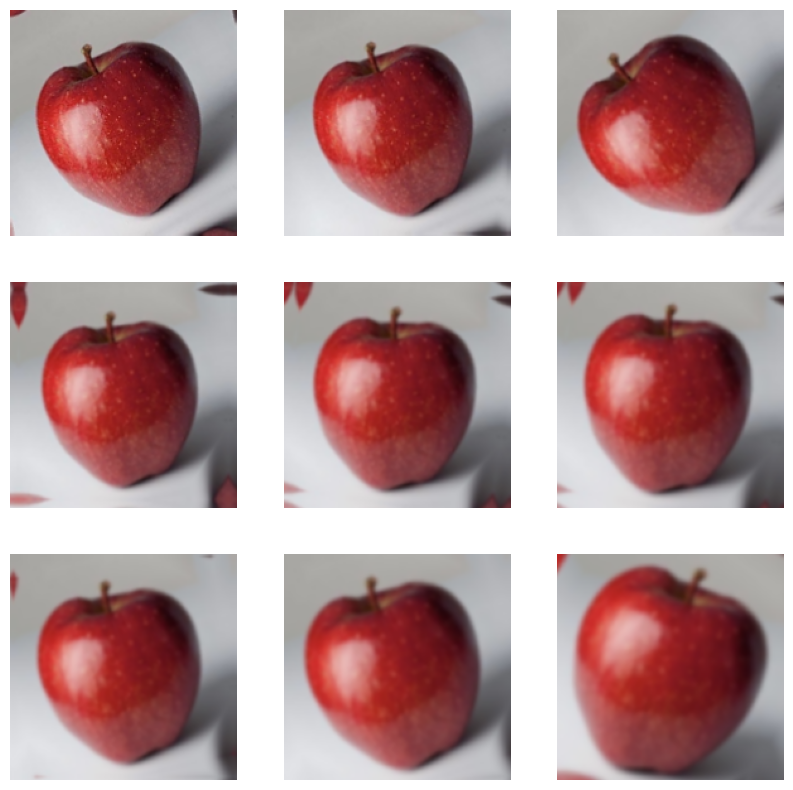

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

base_dir = '/content/drive/MyDrive/UAS PMDPM/DATASET APEL'

img_size = 180
batch = 32
validation_split = 0.1

dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="training",
    interpolation="bilinear"
)

class_names = dataset.class_names
print("Class Names:", class_names)

total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

data_augmentation = Sequential([
    layers.RandomFlip("diagonal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

base_model = MobileNet(include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Found 300 files belonging to 3 classes.
Using 270 files for training.
Class Names: ['Apel Hijau', 'Apel Kuning', 'Apel Merah']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
<ipython-input-7-0e439f9fe053>:64: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape=(img_size, img_size, 3))


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3035 - loss: 2.7751
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3325 - loss: 1.5831  
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3861 - loss: 1.4423
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4612 - loss: 1.1945
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5212 - loss: 1.1852  
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5153 - loss: 1.1083  
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5794 - loss: 0.9036  
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6246 - loss: 0.9411
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6397 - loss: 0.8227  
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6123 - loss: 0.7707  
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6890 - loss: 0.7627
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7731 - loss: 0.5856  
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 936ms/step - accuracy: 0.6961 - loss: 0.7115
Epoch 1

Error: [Errno 2] No such file or directory: '/content/drive/MyDrive/UAS_PMDPM/Test/TestApelMerah/testApelMerah01.jpg'


NotFoundError: Could not find directory /content/drive/MyDrive/UAS_PMDPM/Test

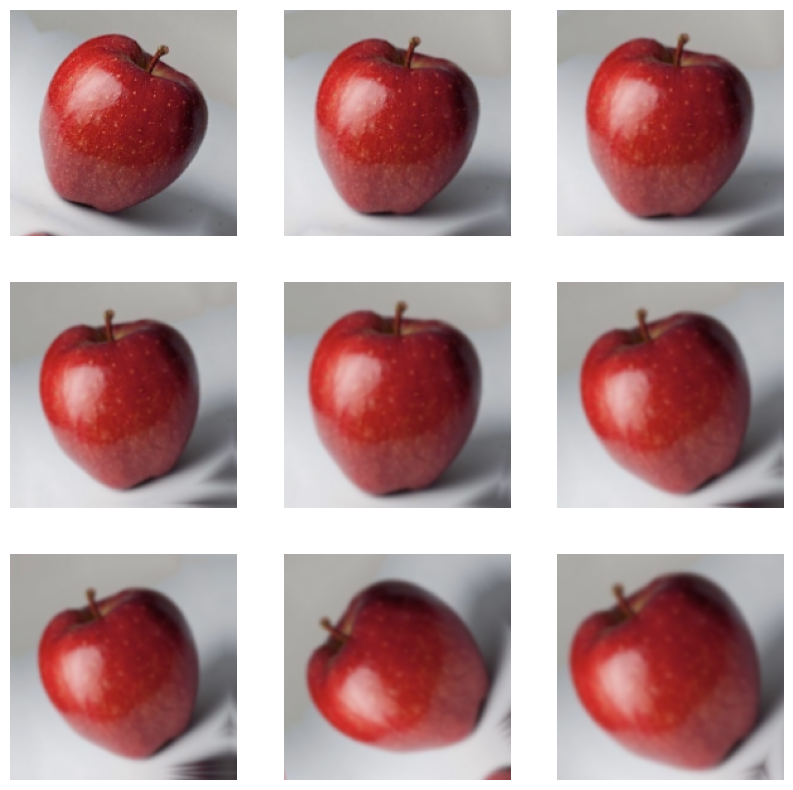

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

base_dir = '/content/drive/MyDrive/UAS PMDPM/DATASET APEL'

img_size = 180
batch = 32
validation_split = 0.1

dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="training",
    interpolation="bilinear"
)

class_names = dataset.class_names
print("Class Names:", class_names)

total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

data_augmentation = Sequential([
    layers.RandomFlip("diagonal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


base_model = MobileNet(include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)), # Rescaling as the first layer
    base_model,
    layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])

def augment_data(image, label):
    image = data_augmentation(image)
    return image, label

train_ds = train_ds.map(augment_data)
val_ds = val_ds.map(augment_data)


model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')


history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

model.save('/content/drive/MyDrive/UAS_PMDPM/model_mobilenet.h5')

def classify_images(image_path, model, class_names):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediction: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save('/content/drive/MyDrive/UAS_PMDPM/predicted_image.jpg')

        return f"Prediction: {class_names[class_idx]} with {confidence:.2f}% confidence. Image saved."
    except Exception as e:
        return f"Error: {e}"



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: Apel Merah
Confidence: 43.49%
Prediction: Apel Merah with 43.49% confidence. Image saved.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: Apel Kuning
Confidence: 56.43%
Prediction: Apel Kuning with 56.43% confidence. Image saved.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Apel Hijau
Confidence: 40.32%
Prediction: Apel Hijau with 40.32% confidence. Image saved.
Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


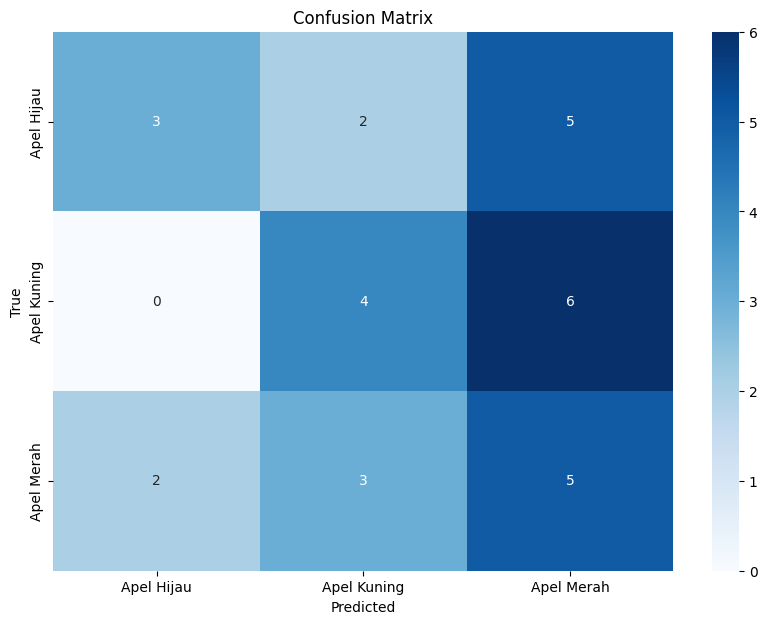

In [15]:
import seaborn as sns

image_path = '/content/drive/MyDrive/UAS PMDPM/Test/TestApelMerah/testApelMerah02.jpg'
result = classify_images(image_path, model, class_names)
print(result)

image_path = '/content/drive/MyDrive/UAS PMDPM/Test/TestApelKuning/testApelKuning02.jpg'
result = classify_images(image_path, model, class_names)
print(result)

image_path = '/content/drive/MyDrive/UAS PMDPM/Test/TestApelHijau/testApelHijau04.jpg'
result = classify_images(image_path, model, class_names)
print(result)

test_dir = '/content/drive/MyDrive/UAS PMDPM/Test'
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_size, img_size)
)

y_pred = model.predict(test_data)
y_pred_class = np.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(np.argmax(labels, axis=1))

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()